<a href="https://colab.research.google.com/github/Himansirudra52/YOLO_WORLD/blob/main/YOLO_WORLD_OD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
zip_path = '/content/drive/MyDrive/datasets/filtered_coco.zip'


In [4]:
!ls drive/MyDrive

'=0.20,'
'10th (1).jpg'
 10th.jpg
'=1.26'
'12th (1).jpg'
'12th (2).jpg'
 12th.jpg
'=13.7.1'
'1st B.TECH MESS CREDIT STATEMENT (MCS).pdf'
 422156_HimansiRudra.gdoc
 422156_HimansiRudra.pdf
 422156_HimansiRudra.pdf.gdoc
 422156.jpeg
'422156-lab programs.gdoc'
'422156-lab programs.pdf'
'422156-Lab record.gdoc'
'422156 LAB RECORD.gdoc'
'422156- Lab Record.gdoc'
 422156.pptx
'422156_SE Assignment1.gdoc'
'422156_SE ASSIGNMENT.gdoc'
 422160_ci-cd.gdoc
 47FAA484-4C7F-42AD-997D-5561672FEFDC.jpeg
 4E71A26F-F0E7-49E7-BE93-C3E6AEE3AD00.jpeg
'9221102_Himansi rudra.PNG'
 Aadhar.heic
 ACTIVITY.drawio
'ASSIGNMENT 3_422156.gdoc'
 assignment5_422156.gdoc
 assignmet7.gdoc
 chapter04a.gdoc
'c language.pdf'
 Classroom
'Colab Notebooks'
'Copy of 8 WASTE WATER TREATMENT.pdf'
 custom_dataset.zip
 cycle.jpg
'DSA_lab12 422156.gdoc'
'DSA lab 5 (1).gdoc'
'DSA lab 5.docx'
'DSA lab 5.gdoc'
 ece_assignment.gdoc
 ermodel.drawio
'EVEN SEM HOSTEL FEE CIRCULAR FOR B.TECH AY 2024-25.pdf'
 filtered_coco.zip
'Himansi 10th 

In [5]:
!unzip "/content/drive/MyDrive/filtered_coco.zip" -d "/content/filtered_coco"


Streaming output truncated to the last 5000 lines.
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000181906.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000403454.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000345867.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000434128.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000116455.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000558983.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000005652.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000249120.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000571427.jpg  
  inflating: /content/filtered_coco/content/filtered_coco/images/train/000000250427.jpg  
  inflating: /content/filtered_coco/content/filte

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
import ultralytics
ultralytics.__version__


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


'8.3.130'

In [8]:

from ultralytics import YOLOWorld

# Load a pretrained YOLOv8s-world model
model = YOLOWorld("yolov8s-world.pt")


100%|██████████| 25.9M/25.9M [00:00<00:00, 32.0MB/s]


In [9]:
!pip install ultralytics torch


In [10]:
from ultralytics import YOLOWorld

model = YOLOWorld('yolov8s-worldv2.pt')  # Adjust the model path as needed


100%|██████████| 24.7M/24.7M [00:00<00:00, 44.4MB/s]


In [11]:
from ultralytics import YOLOWorld

model = YOLOWorld('yolov8s-worldv2.pt')

model.train(
    data='/content/filtered_coco/content/filtered_coco/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='custom_train_run',
    device=0
)


Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/filtered_coco/content/filtered_coco/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-worldv2.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_train_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...


  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-e39rfglu
  Resolved https://github.com/ultralytics/CLIP.git to commit 842ad30729a3147eb9fdb6013ca7addba14fba49
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 153.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1382552 sha256=79477773a08629ff56edecb64239a698ed9a44bf1a7c5d378f25bf9691bded0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-8mfn6v_9/wheels/04/89/1d/c5712518ddb082b177c25dd0e1119b6a1c45ea1ab4e7fcd8a6
Successfully built clip

requirements: AutoUpdate success ✅ 9.7s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']


100%|██████████| 5.35M/5.35M [00:00<00:00, 264MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 62.7±16.6 MB/s, size: 200.2 KB)


train: Scanning /content/filtered_coco/content/filtered_coco/labels/train... 2700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2700/2700 [00:06<00:00, 386.01it/s]

train: New cache created: /content/filtered_coco/content/filtered_coco/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.8±18.9 MB/s, size: 134.4 KB)


val: Scanning /content/filtered_coco/content/filtered_coco/labels/val... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 425.80it/s]


val: New cache created: /content/filtered_coco/content/filtered_coco/labels/val.cache
Plotting labels to runs/detect/custom_train_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 67 weight(decay=0.0), 72 weight(decay=0.0005), 81 bias(decay=0.0)


100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 28.5MiB/s]


Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom_train_run
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.27G       1.05      1.123      1.164         80        640: 100%|██████████| 169/169 [01:32<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        300       1512      0.544      0.455      0.489      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.45G      1.094      1.141      1.184         69        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        300       1512       0.43      0.472      0.456      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.47G      1.161       1.22      1.211         81        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]

                   all        300       1512      0.374      0.381       0.37      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.47G      1.157       1.25      1.211        105        640: 100%|██████████| 169/169 [01:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        300       1512        0.5      0.415      0.429      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.47G      1.177      1.272      1.224        100        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]

                   all        300       1512      0.441      0.424      0.396      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.47G      1.155      1.188      1.208        109        640: 100%|██████████| 169/169 [01:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        300       1512      0.625      0.333        0.4      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.47G      1.139      1.202       1.21        110        640: 100%|██████████| 169/169 [01:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        300       1512      0.492      0.458      0.432      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.47G      1.135      1.118      1.195        119        640: 100%|██████████| 169/169 [01:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]

                   all        300       1512      0.442      0.446      0.436      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.47G      1.132      1.131      1.199        143        640: 100%|██████████| 169/169 [01:30<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        300       1512      0.414      0.423      0.432      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.47G      1.095      1.087      1.181         98        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]


                   all        300       1512      0.486       0.44      0.432      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.47G      1.097      1.057      1.179        125        640: 100%|██████████| 169/169 [01:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]

                   all        300       1512      0.466       0.46      0.444      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.47G      1.085      1.056      1.167        138        640: 100%|██████████| 169/169 [01:30<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]

                   all        300       1512      0.507      0.443       0.45       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.47G      1.073      1.018       1.16        105        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        300       1512      0.542      0.414      0.449      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.47G      1.061     0.9734      1.144         64        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        300       1512      0.648      0.432      0.482      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.47G      1.061     0.9851      1.149        112        640: 100%|██████████| 169/169 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]

                   all        300       1512      0.497      0.474      0.459      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.47G      1.032      0.919      1.132        128        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


                   all        300       1512        0.5      0.465      0.473      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.47G      1.015     0.9099      1.122         57        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]

                   all        300       1512      0.499      0.456      0.472      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.47G      1.008     0.8871       1.12        127        640: 100%|██████████| 169/169 [01:30<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        300       1512      0.554      0.443      0.473      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.47G     0.9987     0.8728      1.109         73        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]

                   all        300       1512      0.472      0.472      0.463      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.47G     0.9928     0.8458      1.108        102        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]

                   all        300       1512      0.499      0.506      0.485      0.334


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.47G     0.9659     0.8216      1.085         57        640: 100%|██████████| 169/169 [01:31<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]

                   all        300       1512      0.537       0.45      0.463      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.47G     0.9461     0.7472      1.069         50        640: 100%|██████████| 169/169 [01:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        300       1512      0.504      0.485       0.48      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.47G     0.9263     0.7191      1.061         44        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        300       1512      0.509      0.502      0.493      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.47G     0.9176     0.7053      1.051         27        640: 100%|██████████| 169/169 [01:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        300       1512      0.503      0.446       0.48      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.47G     0.8848     0.6721      1.034         71        640: 100%|██████████| 169/169 [01:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


                   all        300       1512      0.487      0.532      0.523      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.47G       0.88     0.6596       1.03         73        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]

                   all        300       1512      0.603      0.482      0.503      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.47G     0.8767     0.6533      1.034         54        640: 100%|██████████| 169/169 [01:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        300       1512      0.567      0.487      0.507      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.47G     0.8583     0.6229       1.02         67        640: 100%|██████████| 169/169 [01:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]

                   all        300       1512      0.534      0.525      0.518      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.47G     0.8512      0.609      1.012         48        640: 100%|██████████| 169/169 [01:30<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]

                   all        300       1512      0.562       0.53      0.508      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.47G      0.838     0.5966      1.006         30        640: 100%|██████████| 169/169 [01:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]

                   all        300       1512      0.547      0.532      0.512      0.364



30 epochs completed in 0.781 hours.
Optimizer stripped from runs/detect/custom_train_run/weights/last.pt, 25.8MB
Optimizer stripped from runs/detect/custom_train_run/weights/best.pt, 25.8MB

Validating runs/detect/custom_train_run/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-worldv2 summary (fused): 87 layers, 12,749,288 parameters, 0 gradients, 35.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        300       1512      0.485      0.533      0.523      0.367
                person        227        972      0.568      0.712      0.707      0.478
                 zebra         11         22       0.87      0.909      0.942      0.685
                   cat         13         15      0.626      0.733      0.775      0.599
                   dog          9         11      0.339      0.455      0.336      0.289
               giraffe         11         34      0.845      0.824      0.837      0.673
                 apple          3         27      0.353      0.185      0.227      0.153
                banana         10         27      0.478      0.204      0.365      0.193
            cell phone         19         24      0.271      0.167      0.127     0.0736
               bicycle          9         14       0.32      0.643      0.523      0.325
                  bird         11         60      0.302      0.517      0.359      0.221
              umbrell

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebbf3148150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [12]:
from ultralytics import YOLOWorld

# Load model
model = YOLOWorld("yolov8s-worldv2.pt")

# Set the class prompts you want the model to detect
model.set_classes(["zebra", "horse", "dog"])  # replace with your actual prompts

# Run prediction
results = model.predict(
    source="/content/filtered_coco/content/filtered_coco/images/val/000000003867.jpg",
    conf=0.25
)

# Save results if running in notebook/cloud environment
results[0].save(filename="output.jpg")



image 1/1 /content/filtered_coco/content/filtered_coco/images/val/000000003867.jpg: 416x640 2 zebras, 82.8ms
Speed: 5.2ms preprocess, 82.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 640)


'output.jpg'

In [16]:
import os
from collections import defaultdict

# Define paths and classes
labels_dir = "/content/filtered_coco/content/filtered_coco/labels"
class_names = [
    "person", "zebra", "cat", "dog", "giraffe", "apple", "banana", "cell phone",
    "bicycle", "bird", "umbrella", "elephant", "kite", "tv", "book"
]
class_id_map = {i: name for i, name in enumerate(class_names)}

# Initialize counters
image_count = defaultdict(set)
instance_count = defaultdict(int)

# Scan train and val folders
for split in ["train", "val"]:
    split_path = os.path.join(labels_dir, split)
    for file in os.listdir(split_path):
        if not file.endswith(".txt"):
            continue
        with open(os.path.join(split_path, file), "r") as f:
            for line in f:
                cls_id = int(line.split()[0])
                if cls_id in class_id_map:
                    instance_count[cls_id] += 1
                    image_count[cls_id].add(file)

# Print results
print(f"{'Class':<15} {'Images':<10} {'Instances':<10} {'Avg/Img':<10}")
print("="*50)
for cls_id, cls_name in class_id_map.items():
    images = len(image_count[cls_id])
    instances = instance_count[cls_id]
    avg_per_img = round(instances / images, 2) if images > 0 else 0
    print(f"{cls_name:<15} {images:<10} {instances:<10} {avg_per_img:<10}")


Class           Images     Instances  Avg/Img   
person          2300       9551       4.15      
zebra           65         177        2.72      
cat             125        136        1.09      
dog             141        189        1.34      
giraffe         89         207        2.33      
apple           58         214        3.69      
banana          88         429        4.88      
cell phone      165        231        1.4       
bicycle         111        253        2.28      
bird            112        465        4.15      
umbrella        141        422        2.99      
elephant        82         226        2.76      
kite            85         325        3.82      
tv              167        206        1.23      
book            181        916        5.06      


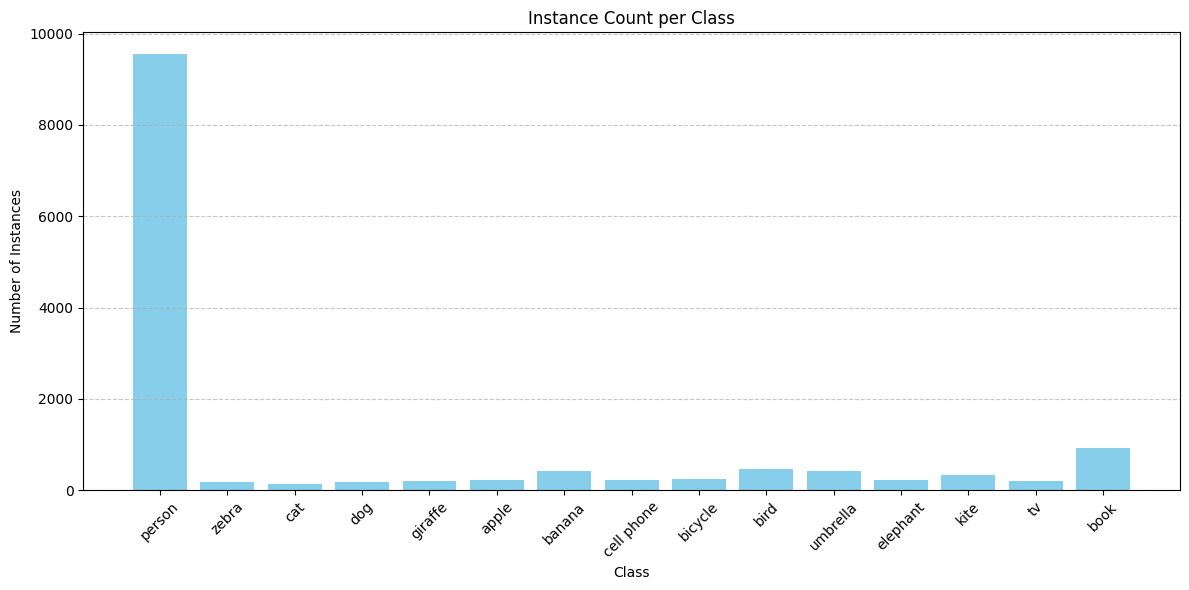

In [17]:
import matplotlib.pyplot as plt

# Class names and their instance counts
class_names = [
    "person", "zebra", "cat", "dog", "giraffe", "apple", "banana",
    "cell phone", "bicycle", "bird", "umbrella", "elephant", "kite", "tv", "book"
]

instance_counts = [
    9551, 177, 136, 189, 207, 214, 429,
    231, 253, 465, 422, 226, 325, 206, 916
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(class_names, instance_counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Instance Count per Class')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
